In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import ghibtools as gh
import matplotlib.pyplot as plt

In [2]:
N = 20 # Nombre de participants dont les données sont simulées sur la base de celles du premier participant acquis

valeur_baseline = 60.2 # Valeur mesurée en baseline chez le premier participant
valeur_odor = 80.6 # Valeur mesurée en condition odeur chez le premier participant
valeur_music = 74.9 # Valeur mesurée en condition musique chez le premier participant

sd_estimée_baseline = 5.1 # Valeur calculée en baseline chez le premier participant
sd_estimée_odor = 7.5 # Valeur calculée en condition odeur chez le premier participant
sd_estimée_music = 6.4 # Valeur calculée en condition musique chez le premier participant

In [25]:
save_folder = '../../Analyses/'

In [4]:
participants = []
for i in range(1 ,N + 1):
    if i < 10:
        participants.append(f'P0{i}')
    else:
        participants.append(f'P{i}')

In [16]:
label_metric = 'RMSSD'
label_condition = 'Stimulation'

conditions = ['Baseline','Odor','Music']

In [17]:
mu = {conditions[0]:valeur_baseline, conditions[1]:valeur_odor,conditions[2]:valeur_music}
sd = {conditions[0]:sd_estimée_baseline, conditions[1]:sd_estimée_odor,conditions[2]:sd_estimée_music}

In [18]:
concat = []
for condition in conditions:
    data = np.random.randn(N) * sd[condition] + mu[condition]
    df_stim = pd.DataFrame(columns = ['subject',label_condition,label_metric])
    df_stim[label_metric] = data
    df_stim[label_condition] = condition
    df_stim['subject'] = participants
    concat.append(df_stim)
df = pd.concat(concat)

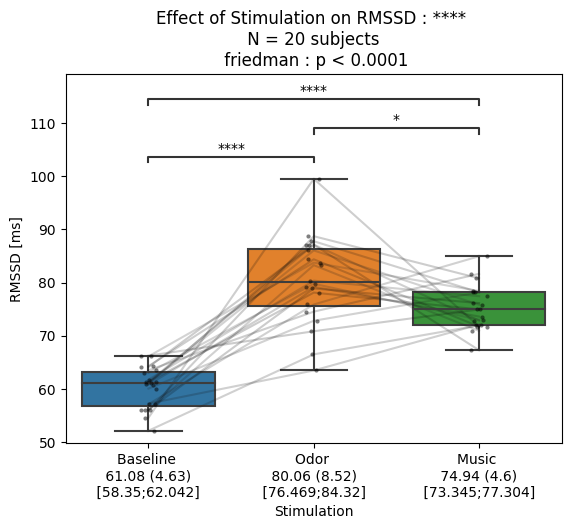

In [27]:
fig, ax = plt.subplots()
gh.auto_stats(df=df, predictor = label_condition, outcome = label_metric, design = 'within', subject = 'subject', ax=ax, outcome_unit = 'ms')
# ax.set_ylabel(label_metric)
# fig.savefig(save_folder + 'conductance_cutanee2', bbox_inches = 'tight')
# fig.savefig(save_folder + 'RMSSD', bbox_inches = 'tight')